In [157]:
import pandas as pd

In [213]:
path = 'data/processed'
df = pd.read_csv(path+"/COVID19_ZM_transformedTweets.csv")
df['created_at'] =  pd.to_datetime(df['date'])
df['date'] =  pd.to_datetime(df['created_at']).dt.date
print(df.shape)
df.head(1)

(5232, 11)


,Unnamed: 0,Hashtags,Sentiment,SentimentClass,date,geo,id,retweets,text,username,created_at
0,0,NaN,-0.5,Negative,2020-05-13,NaN,1260466697661808642,0,Zambia May Not Get IMF Covid Loan Because It H...,ZambianObserver,2020-05-13 07:07:33+00:00


In [250]:
merged_text_col=merge_df_col_val(df["text"])
remove_RT_from_text=remove_RT(merged_text_col)
punct_rmvd_from_txt=remove_punct_marks(merged_text_col)
stp_wrds_rmvd_from_txt=remove_stop_words(punct_rmvd_from_txt)
meanless_wrds_rmvd_from_txt=remove_meaninglesswords(stp_wrds_rmvd_from_txt)
rmv_numbers_from_txt=remove_numeric(meanless_wrds_rmvd_from_txt)

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')

#create freq and dist plot
words=rmv_numbers_from_txt.split(" ")
nlp_words=nltk.FreqDist(words).most_common(25)

df_freq=pd.DataFrame(nlp_words, columns=['word', 'frequency'])
df_freq.head()

,word,frequency
0,tanzania,397
1,border,277
2,country,273
3,lusaka,225
4,death,223


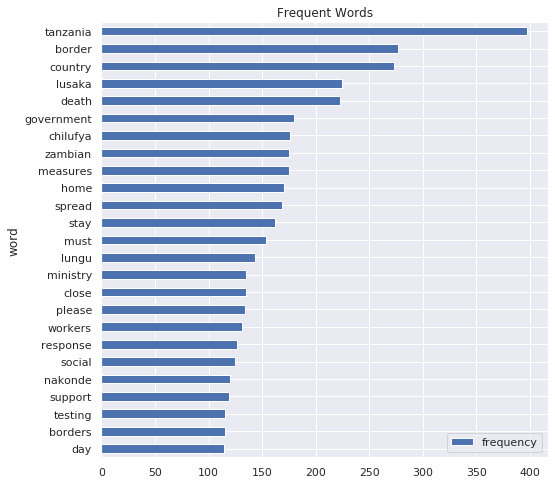

In [252]:
fig,ax=plt.subplots(figsize=(8,8))

df_freq.sort_values(by='frequency').plot.barh(x="word",y="frequency",ax=ax)
ax.set_title("Frequent Words")
plt.show()

In [246]:
import nltk
nltk.download('stopwords')

sw=nltk.corpus.stopwords.words('english')

def remove_stop_words(txt):
    words= txt.split(" ")
    words_ns=[]
    
    for word in words:
        if word not in sw:
            words_ns.append(word)
    
    return list_to_str(words_ns)

[nltk_data] Downloading package stopwords to /home/yas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [218]:
def remove_numeric(txt):
    words=txt.split(" ")
    words_ns=[]
    
    for word in words:
        if word.isnumeric() == False:
            words_ns.append(word)
    return list_to_str(words_ns)

In [98]:
def list_to_str(lst):
    nwstr=""
    for i in lst:
        nwstr+=i+" "
        
    return nwstr

In [99]:
def get_nouns(txt):
    nouns=['NNP','NN']
    new_tagged=[]
    
    text = word_tokenize(txt)
    tagged = nltk.pos_tag(text) 
    
    for tag in tagged:
        if tag[1] in nouns:
            new_tagged.append(tag[0])

    return list_to_str(new_tagged)
  

In [253]:
def remove_meaninglesswords(txt):
    words=txt.split(" ")
    meanless_words=['rt','help','day','bit','virus','fight','pandemic','angola','corona','read','world','due','deaths','http','https','amid','time','via','www','people','amp','dr','com','today','health', \
                    'minister','covid_19','countries','covid-19','zambia','covid','coronavirus', \
                   'cases','new','last','recorded','update','24hrs','test','covid19', \
                    'one','us','mwebantu','confirmed','number','tested','positive', \
                    'done','public','tests','recorded','case','records','active', \
                    'like','says','stands','total','need','free','namibia','first','two', 'hours',
                    'botswana','let','burundi','may', 'central' ,'african','republic', 'cote','ivoire', \
                'eritrea','tests','ethiopia','ly', 'kenya', 'malawi','zimbabwe','news', 'mozambique', 'namibia', \
                    'rwanda','president','south','nigeria','chitalu','facebook','town','africa','100th','eswatini','recorded','uganda']
    words_ns=[]
    
    for word in words:
        if word not in meanless_words:
            words_ns.append(word)
    
    return list_to_str(words_ns)

In [101]:
def remove_RT(txt):
    words=txt.split(" ")
    words_ns=[]
    
    for word in words:
        if '@' not in word:
            words_ns.append(word)
    
    return list_to_str(words_ns)

In [175]:
def merge_df_col_val(txt_col):
    newstr=""
    for t in txt_col.values.flatten():
        newstr+=str(t).lower() + ''
    return newstr

In [103]:
import re

def remove_punct_marks(txt):
    lst= re.findall('\w+',txt)
    
    return list_to_str(lst)

In [104]:
def get_tweet_for_specific_day(str_date):
    d=pd.to_datetime(str_date).date()
    return df.loc[df["_date"]==d]

In [148]:
rmv_numbers_from_txt

'reports cgtn com11 mauricio ruanda rep dem del congo kenia madagascar togo etiopia coronavirusi hear taking seriously opportunity local celebrities work closely government curate palatable messaging stayhomesavelives campaign various languages share stay home photos save would support use location technology track supposed unsupervised quarantine zedtwitter stopcovid19 altnews zoo_bear man biswaroop roy chowdhury alliance internationaluniversity spreading misinformation minimising severity also suggesting docs working fear losing degrees playing along fearthe problem capacity monitor million citizens also know wide spread right guess major cities border towns risk best slow spread isolate minfin projects slower growth due impact minfin projects slower growth due impact thebusinesstelegraph zambias minfin trims growth impact still importing deliberately deadly desease fatal investment according experts potential kill million much govt planning deliberately expose zambiastay safe take p